In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pylcp
import lmfit
from pylcp.common import progressBar

In [154]:
laser_det = -2.5
ham_det = 0.0
s = 2.0

laserBeams = {}
laserBeams['$\\sigma^+\\sigma^-$'] = pylcp.laserBeams([
    {'kvec':np.array([0., 0., -1.]), 'pol':-1,
     'pol_coord':'spherical', 'delta':laser_det, 's':s},
    {'kvec':np.array([0., 0., +1.]), 'pol':+1,
     'pol_coord':'spherical', 'delta':laser_det, 's':s},
    {'kvec':np.array([0., -1., 0.]), 'pol':-1,
     'pol_coord':'spherical', 'delta':laser_det, 's':s},
    {'kvec':np.array([0., +1., 0.]), 'pol':+1,
     'pol_coord':'spherical', 'delta':laser_det, 's':s},
    {'kvec':np.array([-1., 0., 0.]), 'pol':-1,
     'pol_coord':'spherical', 'delta':laser_det, 's':s},
    {'kvec':np.array([+1., 0., 0.]), 'pol':+1,
     'pol_coord':'spherical', 'delta':laser_det, 's':s}
    ], beam_type=pylcp.infinitePlaneWaveBeam)

In [155]:
laserBeams['$\\sigma^+\\sigma^-$'].total_electric_field_gradient(np.array([0., 0., 0.]), 0.)
magField = lambda R: np.zeros(R.shape)

# Hamiltonian for F=1->F=1
Hg, Bgq = pylcp.hamiltonians.singleF(F=1, gF=0, muB=0)
He, Beq = pylcp.hamiltonians.singleF(F=1, gF=0, muB=0)
dijq = pylcp.hamiltonians.dqij_two_bare_hyperfine(1, 1)
ham_F1_to_F1 = pylcp.hamiltonian(Hg, He - ham_det*np.eye(3), Bgq, Beq, dijq)

In [171]:
obe={}
rateeq={}

# Define a v axis:
v = np.arange(0.0, 5.1, 0.1)

for jj, key in enumerate(laserBeams.keys()):
    print('Working on %s:' % key)
    rateeq[key] = pylcp.rateeq(laserBeams[key], magField, ham_F1_to_F1)
    obe[key] = pylcp.obe(laserBeams[key], magField, ham_F1_to_F1,
                         transform_into_re_im=False, include_mag_forces=False)

    # Generate a rateeq model of what's going on:
#     rateeq[key].generate_force_profile(
#         [np.zeros(v.shape), np.zeros(v.shape), np.zeros(v.shape)],
#         [np.zeros(v.shape), np.zeros(v.shape), v],
#         name='molasses'
#     )

    obe[key].generate_force_profile(
        [np.zeros(v.shape), np.zeros(v.shape), np.zeros(v.shape)],
        [np.zeros(v.shape), np.zeros(v.shape), v],
        name='molasses', deltat_tmax=2*np.pi*100, deltat_v=20, itermax=1000,
        progress_bar=True,
    )

Working on $\sigma^+\sigma^-$:
Completed in 27.84 s.                                               


Text(0, 0.5, '$f/(\\hbar k \\Gamma)$')

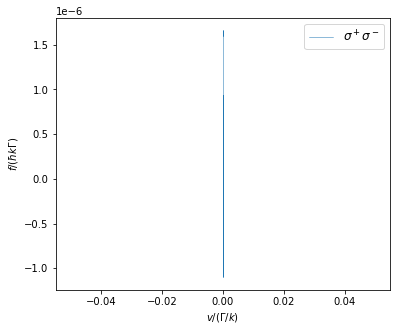

In [172]:
fig, ax = plt.subplots(1, 1, num='Optical Molasses F=1->F1', figsize=(6, 5))
for jj, key in enumerate(laserBeams.keys()):
    ax.plot(obe[key].profile['molasses'].V[0],
               obe[key].profile['molasses'].F[0],
               label=key, linewidth=0.5, color='C%d'%jj)
ax.legend(fontsize=12)
ax.set_xlabel('$v/(\Gamma/k)$')
ax.set_ylabel('$f/(\hbar k \Gamma)$')

In [174]:
print("v", v[-1])
for val in obe[key].profile['molasses'].Neq[-1,:]:
    print(val)

v 5.0
0.0022647646921576145
0.00429753535758853
0.9933094126610547
1.5134869886944758e-189
4.427419057769301e-05
8.401309862128797e-05


In [169]:
print("v", v[-1])
for val in obe[key].profile['molasses'].Neq[-1,:]:
    print(val)

v 5.0
0.06490356280181857
0.12960318459071957
0.7759599861141063
2.4484046653713782e-06
0.009848955509507738
0.019681862579183182


In [170]:
2.4484046653713782e-06 + 0.009848955509507738 + 0.019681862579183182

0.02953326649335629